# ohmic fermion version
This file is the input file of spin-spin bath. According to Nancy and ... the bath corrlation of this tyoe of bath can be recast as:
$$
  C(t) \equiv \langle \hat{F}(t) \hat{F}(0) \rangle_{\mathrm{B}} = \frac{1}{\pi} \int_{- \infty}^{+\infty} d \omega \frac{e^{- i \omega t} J(\omega) }{1 + e^{- \beta \omega}}.
$$
We often use the Ohmic form specturm function , 
$$
  J(\omega) = \frac{\pi}{2} \alpha \omega e^{ - \omega / \omega_c}.
$$
Note the distribution function is fermion type.

In [1]:
import math
from cvxopt import solvers, matrix, spmatrix, mul
from scipy import sparse


def fit_J(w, res, expn, etal):
    for i in range(len(etal)):
        res += etal[i] / (expn[i] - 1.j * w)
    return res


def fit_t(t, res, expn, etal):
    for i in range(len(etal)):
        res += etal[i] * np.exp(-expn[i] * t)
    return res


def numpy_to_cvxopt_matrix(A):
    if A is None:
        return A
    if sparse.issparse(A):
        if isinstance(A, sparse.spmatrix):
            return scipy_sparse_to_spmatrix(A)
        else:
            return A
    else:
        if isinstance(A, np.ndarray):
            if A.ndim == 1:
                return matrix(A, (A.shape[0], 1), 'd')
            else:
                return matrix(A, A.shape, 'd')
        else:
            return A

/tmp/ipykernel_232032/3921547952.py:21: RuntimeWarning: overflow encountered in exp
  jw1 = jw  / (1 + np.exp(- beta * w))


(-100.0, 100.0)

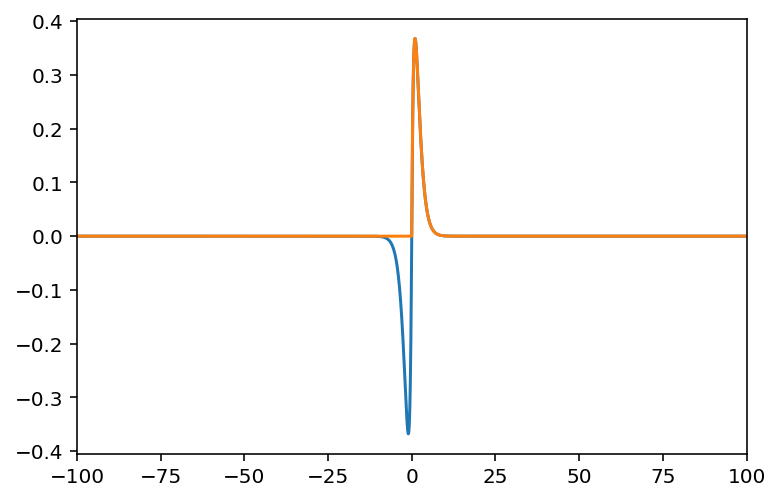

In [2]:
gams1 = 1
lams1 = 1

beta = 100000000000

def gen_jw(w):
    return w * lams1 * np.exp(- gams1 * np.abs(w))
#     return w * lams1 * gams1 / (w * w + gams1 * gams1)

#     jw = np.zeros_like(w)
#     index = (w<=gams1) & (w>=-gams1)
#     jw[index] = lams1 * np.sqrt(gams1**2 - w[index]**2)
#     return jw

len_ = 100000
spe_wid = 100
w = np.linspace(-spe_wid, spe_wid, len_)

sigma = 1
jw = gen_jw(w)
jw1 = jw  / (1 + np.exp(- beta * w))
plt.plot(w, jw)
plt.plot(w, jw1)
plt.xlim(-100, 100)

In [3]:
n = 2000
scale = 200

n_fft = 10000000
scale_fft = 10000

n_rate = (scale_fft * scale/ (4 * n))
print(n_rate)
n_rate = int(n_rate)

w = np.linspace(0, scale_fft * np.pi, n_fft + 1)[:-1]
dw = w[1] - w[0]

jw = gen_jw(w)
cw1 = jw / (1 + np.exp(-beta * w))
cw2 = jw / (1 + np.exp(+beta * w))
del jw

cw1[0] = 0
cw2[0] = 0
fft_ct = (np.fft.fft(cw1) * dw - np.fft.ifft(cw2) * len(cw2) * dw) / np.pi
fft_t = 2 * np.pi * np.fft.fftfreq(len(cw1), dw)
# del cw1, cw2

fft_ct = fft_ct[(scale>=fft_t) & (fft_t >= 0)][::n_rate]
fft_t = fft_t[(scale>=fft_t) & (fft_t >= 0)][::n_rate]

t = fft_t
res_t = np.zeros(len(t), dtype=complex)

250.0


/tmp/ipykernel_232032/356368677.py:16: RuntimeWarning: overflow encountered in exp
  cw2 = jw / (1 + np.exp(+beta * w))


In [4]:
# cw1

/tmp/ipykernel_232032/4036198503.py:7: RuntimeWarning: overflow encountered in exp
  jw1 = jw / (1 + np.exp(-beta * w))
/home/dhem/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


array([ 3.18309624e-01+0.00000000e+00j,  3.15932213e-01-3.16724285e-02j,
        3.08917283e-01-6.24075848e-02j, ...,
       -8.23215659e-06-7.96396665e-08j, -8.22817650e-06-7.95798846e-08j,
       -8.22419940e-06-7.95201624e-08j])

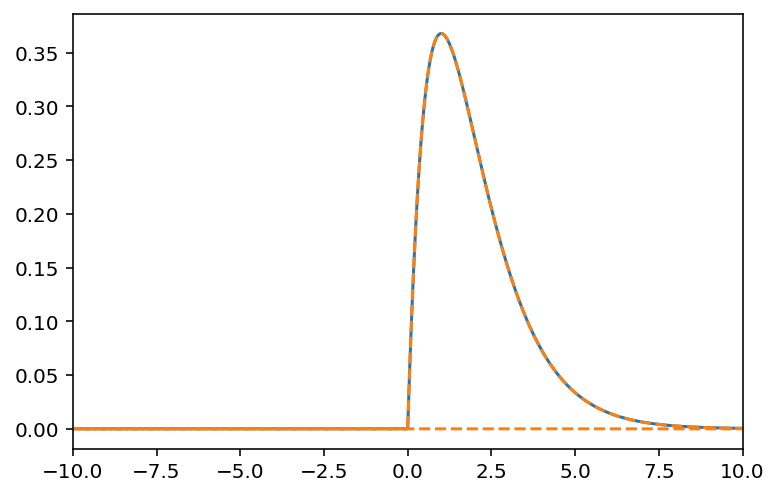

In [5]:
len_ = 1000000
spe_wid = 10
w = np.linspace(-spe_wid, spe_wid, len_)

sigma = 1
jw = gen_jw(w)
jw1 = jw / (1 + np.exp(-beta * w))
# plt.plot(w, jw)
plt.plot(w, jw1)
fft_ct[0] = fft_ct[0] / 2
plt.plot(2 * np.pi * np.fft.fftfreq(len(fft_ct), fft_t[1] - fft_t[0]),
         len(fft_ct) * (fft_t[1] - fft_t[0]) * np.fft.ifft(fft_ct), '--')
plt.xlim(-10, 10)
fft_ct[0] = fft_ct[0] * 2

fft_ct

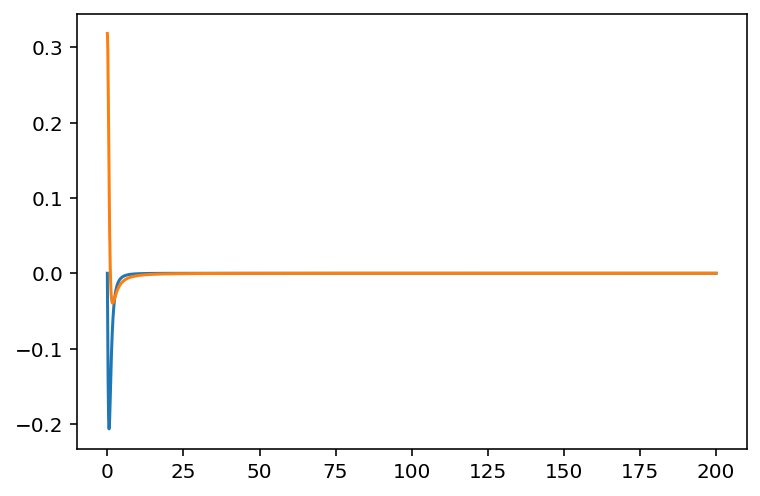

[0.31830962+0.j         0.31593221-0.03167243j 0.30891728-0.06240758j
 0.29760476-0.09133658j 0.28252331-0.11771815j 0.26434013-0.14098154j
 0.24380245-0.16074904j 0.22167874-0.17683795j 0.19870686-0.18924488j
 0.17555371-0.19811733j]
[-8.26010111e-06-8.00598191e-08j -8.25610003e-06-7.99996169e-08j
 -8.25210195e-06-7.99394749e-08j -8.24810688e-06-7.98793931e-08j
 -8.24411481e-06-7.98193715e-08j -8.24012574e-06-7.97594099e-08j
 -8.23613967e-06-7.96995082e-08j -8.23215659e-06-7.96396665e-08j
 -8.22817650e-06-7.95798846e-08j -8.22419940e-06-7.95201624e-08j]


In [6]:
plt.plot(fft_t, np.imag(fft_ct))
plt.plot(fft_t, np.real(fft_ct))
# plt.xlim(0, 10)
plt.show()
print(fft_ct[:10])
print(fft_ct[-10:])

In [7]:
res_t = fft_ct.copy()
print(res_t[-100:])
n_sample = n
print(len(t), n_sample)
h = res_t
H_r = np.zeros((n_sample, n_sample))
H_i = np.zeros((n_sample, n_sample))
for i in range(n_sample):
    H_r[i, :] = np.real(h[i:n_sample + i])
    H_i[i, :] = np.imag(h[i:n_sample + i])    

[-8.63290626e-06-8.57346646e-08j -8.62862163e-06-8.56687138e-08j
 -8.62434029e-06-8.56028306e-08j -8.62006225e-06-8.55370148e-08j
 -8.61578749e-06-8.54712665e-08j -8.61151602e-06-8.54055854e-08j
 -8.60724783e-06-8.53399716e-08j -8.60298291e-06-8.52744248e-08j
 -8.59872128e-06-8.52089451e-08j -8.59446291e-06-8.51435324e-08j
 -8.59020781e-06-8.50781865e-08j -8.58595598e-06-8.50129074e-08j
 -8.58170741e-06-8.49476950e-08j -8.57746210e-06-8.48825492e-08j
 -8.57322004e-06-8.48174699e-08j -8.56898124e-06-8.47524571e-08j
 -8.56474568e-06-8.46875106e-08j -8.56051337e-06-8.46226304e-08j
 -8.55628430e-06-8.45578164e-08j -8.55205847e-06-8.44930685e-08j
 -8.54783587e-06-8.44283866e-08j -8.54361651e-06-8.43637707e-08j
 -8.53940037e-06-8.42992205e-08j -8.53518746e-06-8.42347362e-08j
 -8.53097777e-06-8.41703175e-08j -8.52677130e-06-8.41059645e-08j
 -8.52256805e-06-8.40416769e-08j -8.51836800e-06-8.39774548e-08j
 -8.51417117e-06-8.39132980e-08j -8.50997754e-06-8.38492065e-08j
 -8.50578712e-06-8.378518

In [8]:
sing_vs_r, Q_r = LA.eigh(H_r)
sing_vs_i, Q_i = LA.eigh(H_i)
phase_mat_r = np.diag(
    [np.exp(-1j * np.angle(sing_v_r) / 2.0) for sing_v_r in sing_vs_r])
vs_r = np.array([np.abs(sing_v_r) for sing_v_r in sing_vs_r])
Qp_r = np.dot(Q_r, phase_mat_r)
sort_array = np.argsort(vs_r)[::-1]
vs_r = vs_r[sort_array]
Qp_r = Qp_r[:, sort_array]

phase_mat_i = np.diag(
    [np.exp(-1j * np.angle(sing_v_i) / 2.0) for sing_v_i in sing_vs_i])
vs_i = np.array([np.abs(sing_v_i) for sing_v_i in sing_vs_i])
Qp_i = np.dot(Q_i, phase_mat_i)
sort_array = np.argsort(vs_i)[::-1]
vs_i = vs_i[sort_array]
Qp_i = Qp_i[:, sort_array]

print(
    "error of decompose",
    np.sum(
        np.abs(H_r -
               np.dot(np.dot(Qp_r, np.diag(vs_r)), (np.transpose(Qp_r))))))
print(vs_r[:10])

print(
    "error of decompose",
    np.sum(
        np.abs(H_i -
               np.dot(np.dot(Qp_i, np.diag(vs_i)), (np.transpose(Qp_i))))))
print(vs_i[:10])

error of decompose 1.7017808731778416e-11
[2.21754616e+00 1.60653160e+00 2.70804735e-01 1.36580480e-01
 3.35600928e-02 1.34967432e-02 6.93751389e-03 1.31423494e-03
 6.39426783e-04 1.63604045e-04]
error of decompose 7.845312690173137e-12
[3.70775136e+00 7.31197046e-01 1.44712462e-01 4.63051693e-02
 1.03549412e-02 2.82096269e-03 1.91708987e-03 4.39224021e-04
 1.57122235e-04 6.97771545e-05]


len of gamma 3
3
len of gamma 3
3
     pcost       dcost       gap    pres   dres
 0: -5.2032e-02 -7.7285e+00  8e+03  9e+01  2e+02
 1:  7.1503e+01 -2.0107e+02  4e+02  3e+00  6e+00
 2:  1.7641e+01 -2.2751e+01  4e+01  3e-02  6e-02
 3:  1.7874e+00 -4.1414e+00  6e+00  4e-04  7e-04
 4: -2.3470e-01 -1.6045e+00  1e+00  6e-05  1e-04
 5: -3.7662e-01 -1.4273e+00  1e+00  5e-05  9e-05
 6: -7.5451e-01 -9.0757e-01  2e-01  1e-06  3e-06
 7: -8.1107e-01 -8.3137e-01  2e-02  3e-15  7e-13
 8: -8.1855e-01 -8.2092e-01  2e-03  2e-15  4e-12
 9: -8.1934e-01 -8.2005e-01  7e-04  2e-15  1e-12
10: -8.1940e-01 -8.2002e-01  6e-04  2e-15  1e-12
11: -8.1961e-01 -8.1973e-01  1e-04  2e-15  2e-13
12: -8.1960e-01 -8.1969e-01  8e-05  2e-15  1e-13
13: -8.1962e-01 -8.1963e-01  2e-05  2e-15  3e-14
14: -8.1962e-01 -8.1963e-01  1e-05  2e-15  1e-14
15: -8.1962e-01 -8.1962e-01  2e-06  2e-15  4e-15
16: -8.1962e-01 -8.1962e-01  1e-06  2e-15  2e-14
17: -8.1962e-01 -8.1962e-01  4e-07  2e-15  4e-14
18: -8.1962e-01 -8.1962e-01  2e-07  

/tmp/ipykernel_232032/2996366017.py:83: RuntimeWarning: overflow encountered in exp
  plt.plot(w, phixx / (1 - np.exp(-beta * w)),
/tmp/ipykernel_232032/2996366017.py:83: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(w, phixx / (1 - np.exp(-beta * w)),


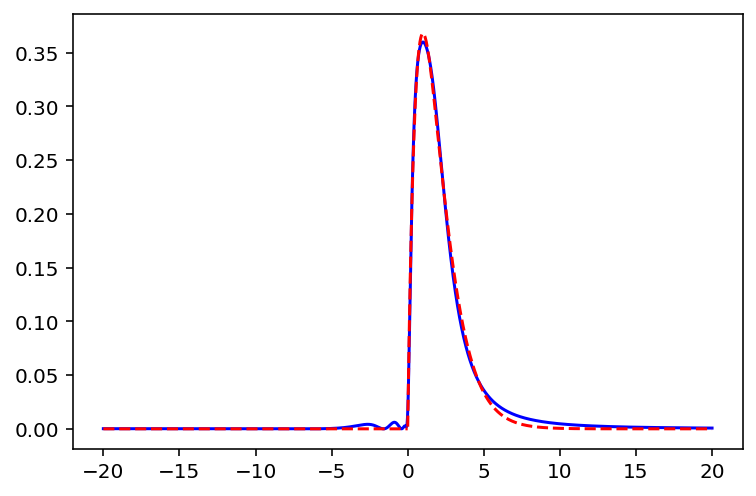

FileNotFoundError: [Errno 2] No such file or directory: './ohmic-fermi/expn-6'

<Figure size 432x288 with 0 Axes>

In [10]:
for n_gamma_r, n_gamma_i in ([3,3], [4,3], [4,4]):
    print("len of gamma", n_gamma_r)
    for i in [n_gamma_r]:
        print(i)
        gamma_r = np.roots(Qp_r[:,i][::-1])
    gamma_new_r = gamma_r[np.argsort(np.abs(gamma_r))[:n_gamma_r]]
    t_new_r = 2*n*np.log(gamma_new_r)
    
    print("len of gamma", n_gamma_i)
    for i in [n_gamma_i]:
        print(i)
        gamma_i = np.roots(Qp_i[:,i][::-1])
    gamma_new_i = gamma_i[np.argsort(np.abs(gamma_i))[:n_gamma_i]]
    t_new_i = 2*n*np.log(gamma_new_i)
    
    gamma_new = np.append(gamma_new_r, gamma_new_i)
    t_new = np.append(t_new_r, t_new_i)
    n_gamma = n_gamma_r + n_gamma_i
    
    n_col = n_sample*2+1
    n_row = n_gamma
    gamma_m = np.zeros((2 * n_col, 2 * n_row), dtype=float)
    for i in range(n_row):
        for j in range(n_col):
            gamma_m[j, i] = np.real(gamma_new[i]**j)
            gamma_m[n_col + j, n_row + i] = np.real(gamma_new[i]**j)
            gamma_m[j, n_row + i] = -np.imag(gamma_new[i]**j)
            gamma_m[n_col + j, i] = np.imag(gamma_new[i]**j)
    h_m = np.append(np.real(h), np.imag(h))

    # freq_d = np.linspace(-1000, 1000, 2 * n_col)
    freq_d = np.append(np.append(np.linspace(-10000, 10, n_col//2), np.linspace(-10, 10, n_col + 1)), np.linspace(10, 10000, n_col//2))

    freq_m = np.zeros((2 * n_col, 2 * n_row), dtype=float)
    expn = -t_new / scale
    for i in range(n_row):
        for j in range(2 * n_col):
            freq_m[j, i] = np.real(expn[i]) / (np.real(expn[i])**2 + (np.imag(expn[i]) - freq_d[j])**2)
            freq_m[j, n_row + i] = (np.imag(expn[i]) - freq_d[j]) / (np.real(expn[i])**2 + (np.imag(expn[i]) - freq_d[j])**2)

    C = numpy_to_cvxopt_matrix(gamma_m)
    d = numpy_to_cvxopt_matrix(h_m)
    A = numpy_to_cvxopt_matrix(-freq_m)
    b = numpy_to_cvxopt_matrix(np.zeros(2 * n_col))
    Q = C.T * C
    q = - d.T * C

    # opts = {'show_progress': True, 'abstol': 1e-7, 'reltol': 1e-6, 'feastol': 1e-7}
    opts = {'show_progress': True, 'abstol': 1e-24, 'reltol': 1e-24, 'feastol': 1e-24}
    for k, v in opts.items():
        solvers.options[k] = v
    sol = solvers.qp(Q, q.T, A, b, None, None, None, None)
    omega_new_temp = np.array(sol['x']).reshape(2, n_gamma)
    omega_new = omega_new_temp[0,:] + 1.j*omega_new_temp[1,:]
    print(omega_new)

    etal_p = omega_new
    expn_p = -t_new / scale
    
    etal = omega_new.copy()
    etar = np.conjugate(omega_new)
    etaa = np.abs(omega_new)
    expn = -t_new / scale

    len_ = 10000
    spe_wid = 20

    w = np.append(np.linspace(-spe_wid, 0, len_),np.linspace(0, spe_wid, len_))

    w_sp, lamd_sp, gams_sp, beta_sp = sp.symbols(
        r"\omega , \lambda, \gamma, \beta", real=True)

    phixx = w * lams1 * np.exp(- gams1 * np.abs(w))
    res_J = np.zeros(len(w),dtype=complex)
    fit_J(w, res_J, expn, etal)

    # plt.plot(w, phixx / (1 - np.exp(-beta * w)) - res_J.real,
    #          'r',
    #          label='phixx')
    plt.plot(w, res_J.real,
             'b',
             label='phixx')
    plt.plot(w, phixx / (1 - np.exp(-beta * w)),
             'r--',
             label='phixx')
    plt.show()
    plt.clf()
    
    np.savetxt("./ohmic-fermi/expn-{}".format(len(expn)), expn)
    np.savetxt("./ohmic-fermi/etal-{}".format(len(etal)), etal)